In [9]:
# Dependencies
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import os

In [10]:
# Import CSV
data = pd.read_csv('Car_safety.csv')

In [11]:
car_data = pd.DataFrame(data)

In [12]:
# Data contain non-numerical values need to convert 
car_data.head(10)

,Buying,Maintenance,Doors,Persons,Lug_Boot,Safety,Class_Values
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
5,vhigh,vhigh,2,2,med,high,unacc
6,vhigh,vhigh,2,2,big,low,unacc
7,vhigh,vhigh,2,2,big,med,unacc
8,vhigh,vhigh,2,2,big,high,unacc
9,vhigh,vhigh,2,4,small,low,unacc


In [5]:
list(car_data.columns.values)

['Buying',
 'Maintenance',
 ' Doors',
 ' Persons',
 ' Lug_Boot',
 ' Safety',
 ' Class_Values']

In [18]:
# creating our x and y
# need to convert data as array within a array, multiple dimensional array
X = car_data[['Buying',
 'Maintenance',
 ' Doors',
 ' Persons',
 ' Lug_Boot',
 ' Safety']]

In [19]:
# get_dummies turn to binary form for every non-numerical value
data_copy = X.copy()

data_binary_encoded = pd.get_dummies(data_copy)
data_binary_encoded.head()

,Buying_high,Buying_low,Buying_med,Buying_vhigh,Maintenance_high,Maintenance_low,Maintenance_med,Maintenance_vhigh,Doors_2,Doors_3,...,Doors_5more,Persons_2,Persons_4,Persons_more,Lug_Boot_big,Lug_Boot_med,Lug_Boot_small,Safety_high,Safety_low,Safety_med
0,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,1,0,1,0
1,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,1,0,0,1
2,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,1,1,0,0
3,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
4,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,1,0,0,0,1


In [15]:
#y_code = data_binary_encoded[[' Class_Values_acc', ' Class_Values_good', ' Class_Values_unacc', ' Class_Values_vgood']]


In [16]:
y = pd.DataFrame(y_code)

In [17]:
y

,Class_Values_acc,Class_Values_good,Class_Values_unacc,Class_Values_vgood
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0
...,...,...,...,...
1723,0,1,0,0
1724,0,0,0,1
1725,0,0,1,0
1726,0,1,0,0


In [20]:
from sklearn.model_selection import train_test_split
X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

k: 1, Train/Test Score: 1.000/0.766
k: 3, Train/Test Score: 0.931/0.826
k: 5, Train/Test Score: 0.907/0.833
k: 7, Train/Test Score: 0.910/0.852
k: 9, Train/Test Score: 0.916/0.843
k: 11, Train/Test Score: 0.915/0.854
k: 13, Train/Test Score: 0.900/0.833
k: 15, Train/Test Score: 0.881/0.819
k: 17, Train/Test Score: 0.858/0.801
k: 19, Train/Test Score: 0.835/0.792


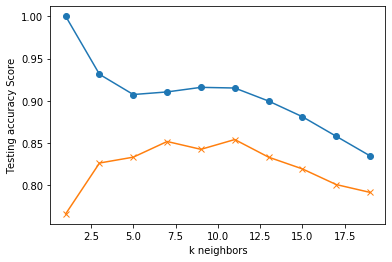

In [21]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [22]:
# Note that k: 11 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train, y_train)
print('k=11 Test Acc: %.3f' % knn.score(X_test, y_test))

k=11 Test Acc: 0.854


In [23]:
predicted_class = knn.predict(X_test)
print(predicted_class)

[[0 0 1 0]
 [0 0 0 0]
 [0 0 1 0]
 ...
 [0 0 1 0]
 [0 0 0 0]
 [0 0 1 0]]


In [24]:
datafram_1 = pd.DataFrame(predicted_class)

In [25]:
datafram_1

,0,1,2,3
0,0,0,1,0
1,0,0,0,0
2,0,0,1,0
3,0,0,0,0
4,0,0,1,0
...,...,...,...,...
427,0,0,1,0
428,1,0,0,0
429,0,0,1,0
430,0,0,0,0


In [38]:
datafram_2 = datafram_1.rename(columns={'0': 'P_Class_Values_acc', '1': 'P_Class_Values_good', '2': 'P_Class_Values_unacc','3': 'P_Class_Values_unacc', '4': 'P_Class_Values_vgood'})

In [45]:
pd.concat([y_test,datafram_1], axis=1)


,Class_Values_acc,Class_Values_good,Class_Values_unacc,Class_Values_vgood,0,1,2,3
0,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0
1,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
2,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0
3,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
4,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
1709,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN
1716,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN
1718,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN
1719,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN


In [48]:
target_names = ["Class_Values_acc","Class_Values_good","Class_Values_unacc","Class_Values_vgood"]

In [43]:
#pd.DataFrame({"Prediction": predicted_class, "Actual": y_test})

In [49]:
# Calculate classification report
from sklearn.metrics import classification_report
predictions = knn.predict(X_test)
print(classification_report(y_test, predictions,
                            target_names=target_names))

                    precision    recall  f1-score   support

  Class_Values_acc       0.92      0.70      0.80       103
 Class_Values_good       1.00      0.13      0.24        15
Class_Values_unacc       0.98      1.00      0.99       294
Class_Values_vgood       1.00      0.10      0.18        20

         micro avg       0.97      0.85      0.91       432
         macro avg       0.98      0.48      0.55       432
      weighted avg       0.97      0.85      0.88       432
       samples avg       0.85      0.85      0.85       432



C:\Users\mralc\Anaconda3\envs\PythonData\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
